In [2]:
'''

import pymongo
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

db = myclient['TwitterData']
tbls = ["2015-Lyrics-Matches", "2016-Lyrics-Matches", "2017-Lyrics-Matches"]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for tbl in tbls: 
    tbl = db[tbl]
    for month in months: 
        print(tbl.count_documents({'createdAt':  {'$regex': month}}))

'''        

'\n\nimport pymongo\nmyclient = pymongo.MongoClient("mongodb://localhost:27017/")\n\ndb = myclient[\'TwitterData\']\ntbls = ["2015-Lyrics-Matches", "2016-Lyrics-Matches", "2017-Lyrics-Matches"]\nmonths = [\'Jan\', \'Feb\', \'Mar\', \'Apr\', \'May\', \'Jun\', \'Jul\', \'Aug\', \'Sep\', \'Oct\', \'Nov\', \'Dec\']\n\nfor tbl in tbls: \n    tbl = db[tbl]\n    for month in months: \n        print(tbl.count_documents({\'createdAt\':  {\'$regex\': month}}))\n\n'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


In [19]:
series = [7075,5558,5841,4883,628,6506,4357,6855,6397,5663,5924,
          1580,318,2745,4104,5325,4173,6102,6581,5877,4559,3832,
          4445,4218,4251,3687,3880,4229,3737,3213,3335,2950,1335,
          1675,2641,2267]

timeline = ['2015-01', '', '', '2015-04', '', '', '2015-07', '', '', '2015-10', '', '',
            '2016-01', '', '', '2016-04', '', '', '2016-07', '', '', '2016-10', '', '',
            '2017-01', '', '', '2017-04', '', '', '2017-07', '', '', '2017-10', '', '']

train_ratio = 0.67
train_size = int(len(series) * train_ratio)
series_train = np.array(series[:train_size])
series_test = np.array(series[train_size:])

In [20]:
x = [i for i in range(0, len(series))]

x1 = [i for i in range(0, train_size)]
y1 = series_train

x2 = [i for i in range(train_size, 36)]
y2 = series_test

In [21]:
# Linear Regression
model = LinearRegression()
model.fit(pd.DataFrame(x1), pd.DataFrame(y1))

coef = model.coef_
intercept = model.intercept_

print('coef', coef)
print('intercept', intercept)

coef [[-36.5626087]]
intercept [5151.55333333]


In [22]:
predicted = []

for i in x2: 
    predicted.append(coef[0][0]*i + intercept[0])

actual = np.array(series_test)
predicted = np.array(predicted)
rmse = np.sqrt(np.mean((actual - predicted) ** 2))

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1269.2707208112527


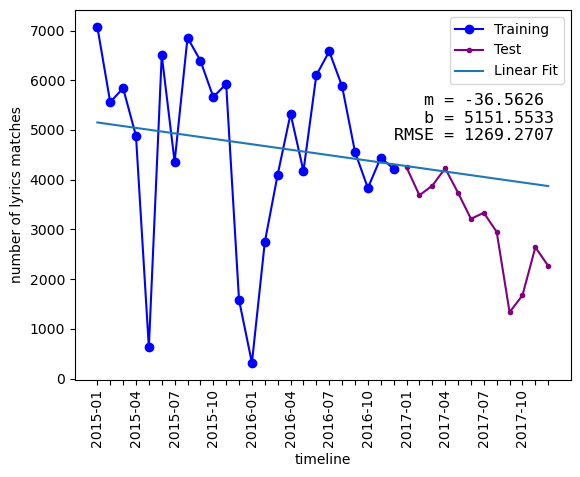

In [23]:
# Create a plot
# plt.figure(figsize=(10, 5))

plt.text(23, 4800, '   m = {:.4f}\n   b = {:.4f}\nRMSE = {:.4f}'.format(coef[0][0], 
                                                                        intercept[0], 
                                                                        rmse), 
                                                                 fontsize=12, 
                                                    fontdict={'family': 'monospace'})


# Plot the dataset
plt.plot(x1, y1, label='Training', marker = 'o', color = 'blue')
plt.plot(x2, y2, label='Test', marker='.', color = 'purple')

# Plot the linear fit
plt.plot(x, coef[0]*x + intercept, label='Linear Fit')

# Add title and labels
plt.title('')
plt.xlabel('timeline')
plt.ylabel('number of lyrics matches')

plt.xticks(ticks=range(len(timeline)), labels=timeline, rotation=90)

# Add legend
plt.legend()

# Show grid
plt.grid(False)

# Display the plot
plt.show()

In [24]:
def r2_score(actual, predicted):
    mean_of_actual = np.mean(actual)
    ss_total = np.sum((actual - mean_of_actual) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    print('ss_total ', ss_total)
    print('ss_residual', ss_residual)
    return r2

In [25]:
print('r2 score', r2_score(actual, predicted))

ss_total  10099094.0
ss_residual 19332577.952504605
r2 score -0.9142883463115212


In [26]:
len(actual)

12

In [27]:
len(series)

36